Article on ResNet: https://blog.paperspace.com/writing-resnet-from-scratch-in-pytorch/

In [ ]:
import cv2 as cv

In [ ]:
#!gdown 17yspNcwvU3bqyy4xtzZEIeF-WORL4OFh
!gdown 1JDdcd8V02fozEw_PVvBfS3Ji2YkPLHbX
!gdown 1iinWqXkqP0TJUKLaqwAOOUyYpsCvGkd6
!gdown 1L9YGgrlfVwb7q0JpkAataZAPtw1DdtCZ
!gdown 1YHHBIY6RqafgEyv4840kw0nr4Wqqg6U5

Downloading...
From (original): https://drive.google.com/uc?id=17yspNcwvU3bqyy4xtzZEIeF-WORL4OFh
From (redirected): https://drive.google.com/uc?id=17yspNcwvU3bqyy4xtzZEIeF-WORL4OFh&confirm=t&uuid=3ecf5b1b-cb44-4ed8-b4f2-4f75c204a34b
To: /content/emotions.zip
100% 330M/330M [00:03<00:00, 96.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JDdcd8V02fozEw_PVvBfS3Ji2YkPLHbX
To: /content/test_problematic2.zip
100% 6.03M/6.03M [00:00<00:00, 16.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1iinWqXkqP0TJUKLaqwAOOUyYpsCvGkd6
From (redirected): https://drive.google.com/uc?id=1iinWqXkqP0TJUKLaqwAOOUyYpsCvGkd6&confirm=t&uuid=e850fed7-27a6-4d83-9b77-538bbfde021e
To: /content/train_problematic2.zip
100% 20.3M/20.3M [00:01<00:00, 16.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1L9YGgrlfVwb7q0JpkAataZAPtw1DdtCZ
From (redirected): https://drive.google.com/uc?id=1L9YGgrlfVwb7q0JpkAataZAPtw1DdtCZ&confirm=t&uuid=7aac4e6d-bf33-45c8-ac65-a25243621c

In [ ]:
import torch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from torch import nn
import torchvision
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
import pandas as pd
import torch.optim.lr_scheduler as lr_scheduler


In [ ]:
device = 'cuda' if torch.cuda.is_available else 'cpu'

In [ ]:
device

'cuda'

In [ ]:
def walk_throuhh_directory(directory_path):
  for dirpath,dirnames,filenames in os.walk(directory_path):
    print(f'There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}')

In [ ]:
import zipfile
from pathlib import Path

In [ ]:
def unzip_folder(folder_path):
  with zipfile.ZipFile(folder_path, 'r') as zip:
    zip.extractall()
    print('Done')

In [ ]:
#unzip_folder('/content/emotions.zip')
unzip_folder('/content/fer.zip')

Done


In [ ]:
import pandas as pd

In [ ]:
#labels = pd.read_csv('/content/labels.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/labels.csv'

In [ ]:
original_folder_names = ['anger','contempt','disgust','fear','happy','neutral','sad','surprise']
#original_folder_names = ['angry','disgusted','fearful','happy','neutral','sad','surprised']

In [ ]:
def divide_training_data(original_folder_names: list,labels: pd.DataFrame,splitting_limit_percentage:int = 80, home_path: str = '/content', labels_provided: bool = True, train_extension: str = '/train', test_extension: str = '/test'):

  """

  Divides images in {original_folder_names} folders into training and testing data with correct labels.
  Labels are provided in csv form either in labels variable or are the names of the folders.

  """

  train_path = home_path + train_extension
  test_path = home_path + test_extension

  if os.path.exists(train_path) == False:
      os.mkdir(train_path)
  if os.path.exists(test_path) == False:
      os.mkdir(test_path)

  image_counter = 0
  error_counter = 0
  for folder_name in original_folder_names:

    if os.path.exists(train_path + '/' + folder_name) == False:
      os.mkdir(train_path + '/' + folder_name)

    if os.path.exists(test_path + '/' + folder_name) == False:
      os.mkdir(test_path + '/' + folder_name)

    files_in_folder = os.listdir('/content/' + folder_name)
    number_of_files_in_folder = len(files_in_folder)

    limit = int(number_of_files_in_folder / 100 *80)

    for index, file_name in enumerate(files_in_folder):

      full_path_of_image = folder_name + '/' + file_name

      #get true label from labels dataset
      try:
        label_of_image = labels.loc[labels['pth'] == full_path_of_image].label.item()

        img = Image.open('/content/' + full_path_of_image)
        if index <= limit:
          img.save( train_path + '/'+ label_of_image + '/image' + str(image_counter) + file_name[-4:])
        else:
          img.save(test_path + '/'+ label_of_image + '/image' + str(image_counter) + file_name[-4:])

        image_counter +=1
      except:
        error_counter +=1

  print(f'Saved: {image_counter} images, with {error_counter} errors')


In [ ]:
divide_training_data(original_folder_names,labels)

Saved: 23470 images, with 5572 errors


In [ ]:
def count_files_in_folder(folder_path):
  return len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])

In [ ]:
TRAIN_DIR = '/content/train'
TEST_DIR = '/content/test'

In [ ]:
for folder_name in original_folder_names:
  train_path = TRAIN_DIR + f'/{folder_name}'
  test_path = TEST_DIR + f'/{folder_name}'

  train_number_files = count_files_in_folder(train_path)
  test_number_files = count_files_in_folder(test_path)

  print(f'Folder: {folder_name}, number of train images: {train_number_files}, number of test images: {test_number_files}')

NameError: name 'original_folder_names' is not defined

In [ ]:
problematic_labels = ['disgust','surprise','fear']

In [ ]:
divide_training_data(problematic_labels,labels,train_extension='/train_problematic',test_extension='/test_problematic')

Saved: 7195 images, with 2497 errors


In [ ]:
for folder_name in problematic_labels:
  train_path = '/content/train_problematic' + f'/{folder_name}'
  test_path = '/content/test_problematic' + f'/{folder_name}'

  train_number_files = count_files_in_folder(train_path)
  test_number_files = count_files_in_folder(test_path)

  print(f'Folder: {folder_name}, number of train images: {train_number_files}, number of test images: {test_number_files}')

Folder: disgust, number of train images: 1621, number of test images: 422
Folder: surprise, number of train images: 2529, number of test images: 656
Folder: fear, number of train images: 1595, number of test images: 372


In [ ]:
def divide_training_data_with_problematic_labels(original_folder_names: list,problematic_labels:list ,labels: pd.DataFrame,splitting_limit_percentage:int = 80, home_path: str = '/content', labels_provided: bool = True):

  """
  Divides images in {original_folder_names} into folders with names and problematic images provided in {problematic_labels}
  """

  train_path = home_path + '/train_with_problematic'
  test_path = home_path + '/test_with_problematic'

  if os.path.exists(train_path) == False:
      os.mkdir(train_path)
  if os.path.exists(test_path) == False:
      os.mkdir(test_path)

  regular_image_counter = 0
  train_problematic_image_counter = 0
  problematic_image_counter = 0
  error_counter = 0
  for folder_name in original_folder_names:
    problematic = False

    if folder_name in problematic_labels:
      problematic = True

      if os.path.exists(train_path + '/problematic') == False:
        os.mkdir(train_path + '/problematic')

      if os.path.exists(test_path + '/problematic') == False:
        os.mkdir(test_path + '/problematic')



    if not problematic:

      if os.path.exists(train_path + '/' + folder_name) == False:
        os.mkdir(train_path + '/' + folder_name)

      if os.path.exists(test_path + '/' + folder_name) == False:
        os.mkdir(test_path + '/' + folder_name)

    files_in_folder = os.listdir('/content/' + folder_name)
    number_of_files_in_folder = len(files_in_folder)

    limit = int(number_of_files_in_folder / 100 * splitting_limit_percentage)

    for index, file_name in enumerate(files_in_folder):
        full_path_of_image = folder_name + '/' + file_name

        #get true label from labels dataset
        try:
            label_of_image = labels.loc[labels['pth'] == full_path_of_image].label.item()

            img = Image.open('/content/' + full_path_of_image)
            if index <= limit:
              if problematic:
                img.save(train_path + '/problematic/image' + str(regular_image_counter) + file_name[-4:])
                problematic_image_counter+=1
                train_problematic_image_counter+=1
                #regular_image_counter+=1
              else:
                img.save(train_path + '/' + label_of_image + '/image' + str(regular_image_counter) + file_name[-4:])
                #regular_image_counter +=1
            else:
              if problematic:
                img.save(test_path+ '/problematic/image' + str(regular_image_counter) + file_name[-4:])
                problematic_image_counter+=1
                #regular_image_counter+=1
              else:
                img.save(test_path + '/' + label_of_image + '/image' + str(regular_image_counter) + file_name[-4:])
            regular_image_counter +=1
        except:
            error_counter +=1

  print(f'Saved: {regular_image_counter} regular images,{train_problematic_image_counter} train problematic images,{problematic_image_counter} all problematic images, with {error_counter} errors')

In [ ]:
divide_training_data_with_problematic_labels(original_folder_names,problematic_labels,labels)

Saved: 23168 regular images,7430 train problematic images,9293 all problematic images, with 5874 errors


In [ ]:
# make_archive(
#   'test_with_problematic',
#   'zip',           # the archive format - or tar, bztar, gztar
#   root_dir='/content/test_with_problematic',   # root for archive - current working dir if None
#   base_dir=None)   # start archiving from here - cwd if None too

'/content/test_with_problematic.zip'

SMENI GI SPREMA DIMENZIJATA NA SLIKATA


In [ ]:
data_transform = transforms.Compose([
     transforms.Grayscale(num_output_channels=1),
    transforms.Resize(size=(46, 46)),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
    # transforms.RandomHorizontalFlip(),
    # transforms.RandomVerticalFlip(),
    # transforms.RandomRotation(30)
])

In [ ]:
train_dataset = datasets.ImageFolder(root = TRAIN_DIR,target_transform=None,transform = data_transform)

In [ ]:
class_names = train_dataset.classes

In [ ]:
len(class_names)

7

In [ ]:
test_dataset = datasets.ImageFolder(root = TEST_DIR, transform = data_transform, target_transform=None)

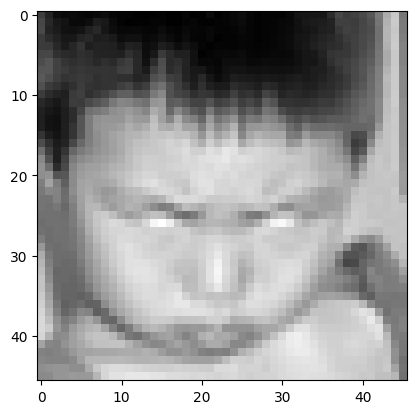

In [ ]:
plt.imshow(train_dataset[0][0].numpy()[0],cmap = 'gray')
plt.show()

In [ ]:
len(train_dataset),len(test_dataset)

(28709, 7178)

In [ ]:
num_of_workers = os.cpu_count()
num_of_workers

2

In [ ]:
train_dataloader = DataLoader(dataset = train_dataset,
                              batch_size = 32,
                              num_workers=num_of_workers,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_dataset,
                              batch_size = 32,
                              num_workers=num_of_workers,
                              shuffle = True)


In [ ]:
len(train_dataloader)

898

In [ ]:
class ResidualBlock(nn.Module):
  def __init__(self, in_channels, hidden_units, stride = 1, downsample = None) -> None:
    super().__init__()

    self.first_conv_block = nn.Sequential(
        nn.Conv2d(in_channels=in_channels, out_channels=hidden_units, kernel_size = 3, stride = stride, padding = 1),
        nn.Dropout(0.25),
        nn.BatchNorm2d(hidden_units),
        nn.ReLU()
    )

    self.second_conv_block = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels = hidden_units, kernel_size = 3, padding =1 ,stride = 1 ),
        nn.BatchNorm2d(hidden_units)
    )

    self.relu = nn.ReLU()

    self.downsample = downsample

  def forward(self, x : torch.Tensor) -> torch.Tensor:

    # make data copy
    input = x

    x = self.first_conv_block(x)
    x = self.second_conv_block(x)

    if self.downsample:

      # transform residual if activ. function is added
      input = self.downsample(input)

    # add residual to conv blocks

    x+=input

    x = self.relu(x)
    return x

In [ ]:
class ResNet(nn.Module):

  def __init__(self,input_shape: int,block_type : nn.Module, layer_sizes: list, num_of_classes: int = 9, inplanes: int = 64 ) -> None:
    super().__init__()

    self.inplanes = inplanes

    self.first_conv = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels = inplanes, kernel_size= 7, stride = 2),
        nn.Dropout(0.25),
        nn.BatchNorm2d(inplanes),
        nn.ReLU()
    )

    self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
    self.avgpool = nn.AvgPool2d(2, stride=1)

    self.layer1 = self._build_block(block_type, inplanes, layer_sizes[0], False, stride =1)
    self.layer2 = self._build_block(block_type, 128, layer_sizes[1], True, stride=2)
    self.layer3 = self._build_block(block_type, 256, layer_sizes[2], True, stride = 2)
    self.layer4 = self._build_block(block_type, 512, layer_sizes[3], True, stride = 2)

    self.output_layer =nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=512,out_features = num_of_classes),
    )

    self.dropout1 = nn.Dropout(0.25)
    self.dropout2 = nn.Dropout(0.5)

  def _build_block(self,block_type: nn.Module, out_planes:int, num_of_blocks:int,contain_downsample:bool = False, stride:int =1) -> nn.Module:

    downsample = None

    # if residual should go through function
    if stride != 1 or self.inplanes != out_planes:
      downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, out_planes, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_planes),
            )

    # layers of residual block will be added here
    layers = []

    # first layer with input size = to output of previous layer
    layers.append(block_type(self.inplanes, out_planes, stride, downsample))
    # change to output
    self.inplanes = out_planes

    # add remaining layers
    for i in range(1,num_of_blocks):
      layers.append(block_type(self.inplanes,out_planes))

    return nn.Sequential(*layers)


  def forward(self,x):

    x = self.first_conv(x)
    x = self.maxpool(x)
   #print(x)
    x = self.layer1(x)
    x = self.dropout1(x)
    x = self.layer2(x)
    x = self.dropout1(x)
    x = self.layer3(x)
    x = self.dropout1(x)
    x = self.layer4(x)
    #x = self.dropout1(x)
    x = self.avgpool(x)

    #x = x.view(x.size(0), -1)
    x = self.output_layer(x)
    return x

In [ ]:
class TinyVGG(nn.Module):

  """
  Architecture replicates TinyVGG.

  CNN Model used to classify emotions from images of human faces.
  Input params:
  input_shape = shape of input (color channels)
  number_of_hidden_units = the number of hidden units for the model
  output_shape = number of classes that the model can predict
  """

  def __init__(self, input_shape: int, hidden_units: int ,output_shape: int) -> None:
    super().__init__()

    self.first_block = nn.Sequential(
      nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3,padding=2,stride = 1),
      nn.ReLU(),
      nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size=3,padding=2,stride = 1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size= 3, padding = 1),
      nn.Dropout(0.25)
    )


    self.second_block = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size=3,padding=1,stride = 1),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size=3,padding=1,stride = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 3, padding = 1),
        nn.Dropout(0.25)
        )

    self.third_block = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size=4,padding=1,stride = 1),
        nn.ReLU(),
        nn.Dropout(0.25),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size=4,padding=1,stride = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 3, padding = 1),
        nn.Dropout(0.25)
    )

    self.fourth_block = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size=3,padding=1,stride = 1),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size=3,padding=1,stride = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2, padding = 1)
    )

    self.classification_block = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*4*4,out_features = 128),
        nn.Dropout(0.25),
        nn.Linear(in_features=128,out_features = 64),
        nn.Linear(in_features=64,out_features = output_shape)
    )

  def forward(self, x):
    x  = self.first_block(x)
    x = self.second_block(x)
    #print(x.shape)
    x = self.third_block(x)
    #x = self.fourth_block(x)
    x = self.classification_block(x)
    #print(x.shape)
    return x

In [ ]:
#model = TinyVGG(1,64,len(class_names)).to(device)

In [ ]:
model = ResNet(1,ResidualBlock, layer_sizes = [3, 4, 6, 3], num_of_classes=len(class_names),inplanes = 64).to(device)

In [ ]:
torch.manual_seed(42)
img, label = next(iter(train_dataloader))
print(f'{img[0].unsqueeze(dim=1).shape}'), label[0]
#print(img[0])

model.eval()
with torch.inference_mode():
  prediction = model(img[0].unsqueeze(dim=1).to(device))

torch.Size([1, 1, 46, 46])


In [ ]:
img[0].unsqueeze(dim=1).shape, label[0]

(torch.Size([1, 1, 46, 46]), tensor(3))

In [ ]:
prediction[0], label[0]

(tensor([-7.2492e-02, -1.0302e-02, -3.9303e-02,  3.7664e-02, -7.4627e-02,
          9.7684e-03,  2.8664e-05], device='cuda:0'),
 tensor(3))

In [ ]:
prediction[0].argmax(dim=0)

tensor(0, device='cuda:0')

In [ ]:
loss_function = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.0001)
#scheduler = lr_scheduler.LinearLR(optimizer, start_factor=1, end_factor=0.0001, total_iters=15)

In [ ]:
from tqdm.auto import tqdm

In [ ]:
def train_model(model: torch.nn.Module, train_dataloader: torch.utils.data.DataLoader,
                loss_function: torch.nn.Module, optimizer: torch.optim.Optimizer ,device: str = 'cpu') -> int:


  """
  Defines one step of model training

  return avg. epoch loss
  """

  epoch_loss = 0

  model.to(device)

  model.train()

  for batch, (X,y) in enumerate(train_dataloader):

    X = X.to(device)
    Y = y.to(device)

    predictions = model(X)

    loss = loss_function(predictions,Y)

    epoch_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


  epoch_loss /= len(train_dataloader)
  print(f'Avg. loss for epoch: {epoch_loss}')
  #print(model.state_dict())
  return epoch_loss


In [ ]:
def test_model(model: torch.nn.Module, test_dataloader: torch.utils.data.DataLoader,
                loss_function: torch.nn.Module, metric = None,device: str = 'cpu'):

  """
  Performs one step of testing on model

  returns: avg. test_loss, avg. evaluation metric
  """

  model.to(device)

  test_loss,metric_loss = 0,0

  model.eval()
  with torch.inference_mode():

    for X,Y in test_dataloader:

      X = X.to(device)
      Y = Y.to(device)

      predictions = model(X)

      loss = loss_function(predictions,Y)

      test_loss += loss

      # if metric is not None:
      #   metric = metric(y_pred = predictions.cpu().argmax(dim=1), y_true = Y.cpu())
      #   metric_loss += metric

    # if metric is not None:
    #   metric_loss /= len(test_dataloader)
    test_loss /= len(test_dataloader)

  print(f'Avg. test loss: {test_loss}, avg. evaluation metric: {metric_loss if metric is not None else 0}')

  return test_loss,metric_loss


In [ ]:
def train_for_epochs(model: torch.nn.Module, train_dataloader: torch.utils.data.DataLoader,
                     test_dataloader: torch.utils.data.DataLoader,
                      loss_function: torch.nn.Module,
                     optimizer: torch.optim.Optimizer,
                     scheduler,
                     epochs: int = 3, metric = None,device: str = 'cpu'):

  """
  Performs model training and testing for multiple epochs
  """
  for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n')
    train_model(model,train_dataloader,loss_function,optimizer,device)
    test_model(model,test_dataloader,loss_function,metric,device)
    print(f'Lr: {optimizer.param_groups[0]["lr"]}')
    #scheduler.step()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
device

'cuda'

In [ ]:
# posle 25 epohi zaglavuva na 1.3 so 1.4-1.5
# go pustiv i do 35 epohi isto e

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_for_epochs(model,train_dataloader,test_dataloader,loss_function,optimizer,None,15,r2_score,device)

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 0

Avg. loss for epoch: 1.2950201034545898
Avg. test loss: 1.3347123861312866, avg. evaluation metric: 0
Lr: 0.0001
Epoch: 1

Avg. loss for epoch: 1.2366961240768433
Avg. test loss: 1.2958571910858154, avg. evaluation metric: 0
Lr: 0.0001
Epoch: 2

Avg. loss for epoch: 1.180493950843811
Avg. test loss: 1.3168383836746216, avg. evaluation metric: 0
Lr: 0.0001
Epoch: 3

Avg. loss for epoch: 1.1237423419952393
Avg. test loss: 1.2682899236679077, avg. evaluation metric: 0
Lr: 0.0001
Epoch: 4

Avg. loss for epoch: 1.0753729343414307
Avg. test loss: 1.2435641288757324, avg. evaluation metric: 0
Lr: 0.0001
Epoch: 5

Avg. loss for epoch: 1.1788692474365234
Avg. test loss: 1.226022481918335, avg. evaluation metric: 0
Lr: 0.0001
Epoch: 6

Avg. loss for epoch: 1.14689040184021
Avg. test loss: 1.185959815979004, avg. evaluation metric: 0
Lr: 0.0001
Epoch: 7

Avg. loss for epoch: 1.12855064868927
Avg. test loss: 1.209346055984497, avg. evaluation metric: 0
Lr: 0.0001
Epoch: 8

Avg. loss for 

In [ ]:
preds = list()
actual = list()
model.eval()
with torch.inference_mode():

    for X,Y in test_dataloader:

      X = X.to(device)
      Y = Y.to(device)
      predictions = model(X)
      predictions = predictions.to('cpu')
      for i in range(len(predictions)):

        preds.append(predictions[i].argmax(dim=0))
        actual.append(Y[i].cpu())

In [ ]:
actual[:5],preds[:5]

([tensor(0), tensor(0), tensor(1), tensor(0), tensor(2)],
 [tensor(2), tensor(0), tensor(2), tensor(7), tensor(0)])

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(class_names)

8

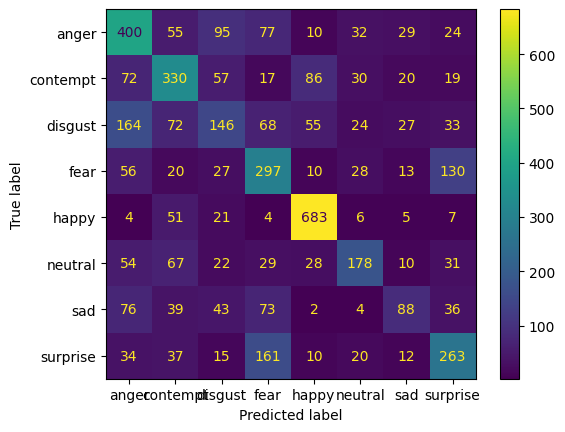

In [ ]:
cm = confusion_matrix(actual, preds, labels=[0,1,2,3,4,5,6,7])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)
disp.plot()
plt.show()

In [ ]:
num_of_workers = os.cpu_count()
num_of_workers

2

In [ ]:
data_transform = transforms.Compose([
     transforms.Grayscale(num_output_channels=1),
    transforms.Resize(size=(96, 96)),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30)
])

In [ ]:
TRAIN_PROBLEMATIC = '/content/train_problematic'
TRAIN_WITH_PROBLEMATIC = '/content/train_with_problematic'
TEST_PROBLEMATIC = '/content/test_problematic'
TEST_WITH_PROBLEMATIC = '/content/test_with_problematic'

In [ ]:
train_problematic_dataset = datasets.ImageFolder(root = TRAIN_PROBLEMATIC,target_transform=None,transform = data_transform)
test_problematic_dataset = datasets.ImageFolder(root = TEST_PROBLEMATIC,target_transform=None,transform = data_transform)
train_with_problematic_dataset = datasets.ImageFolder(root = TRAIN_WITH_PROBLEMATIC,target_transform=None,transform = data_transform)
test_with_problematic_dataset = datasets.ImageFolder(root = TEST_WITH_PROBLEMATIC,target_transform=None,transform = data_transform)

In [ ]:
train_with_problematic_dataloader = DataLoader(dataset = train_with_problematic_dataset,
                              batch_size = 32,
                              num_workers=num_of_workers,
                              shuffle = True)

test_with_problematic_dataloader = DataLoader(dataset = test_with_problematic_dataset,
                              batch_size = 32,
                              num_workers=num_of_workers,
                              shuffle = True)

train_problematic_dataloader = DataLoader(dataset = train_problematic_dataset,
                              batch_size = 32,
                              num_workers=num_of_workers,
                              shuffle = True)

test_problematic_dataloader = DataLoader(dataset = test_problematic_dataset,
                              batch_size = 32,
                              num_workers=num_of_workers,
                              shuffle = True)


In [ ]:
class_names_with_problematic = train_with_problematic_dataset.classes

In [ ]:
model_with_problematic = TinyVGG(1,64,len(class_names_with_problematic)).to(device)

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_with_problematic.parameters(), lr = 0.00001)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_for_epochs(model_with_problematic,train_with_problematic_dataloader,test_with_problematic_dataloader,loss_function,optimizer,None,15,r2_score,device)

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 0

Avg. loss for epoch: 0.6634501814842224
Avg. test loss: 0.7220209240913391, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 1

Avg. loss for epoch: 0.6535312533378601
Avg. test loss: 0.7152283787727356, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 2

Avg. loss for epoch: 0.6421957612037659
Avg. test loss: 0.7176881432533264, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 3

Avg. loss for epoch: 0.6362034678459167
Avg. test loss: 0.7165955901145935, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 4

Avg. loss for epoch: 0.6210834980010986
Avg. test loss: 0.7226920127868652, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 5

Avg. loss for epoch: 0.6395687460899353
Avg. test loss: 0.7136147618293762, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 6

Avg. loss for epoch: 0.6320179104804993
Avg. test loss: 0.7086882591247559, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 7

Avg. loss for epoch: 0.6267886757850647
Avg. test loss: 0.7251593470573425, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 8

Avg. loss for 

In [ ]:
problematic_class_names = train_problematic_dataset.classes

In [ ]:
problematic_class_names

['disgust', 'fear', 'surprise']

In [ ]:
device

'cuda'

In [ ]:
classify_problematic = TinyVGG(1,64,len(problematic_class_names)).to(device)

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = classify_problematic.parameters(), lr = 0.00001)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_for_epochs(classify_problematic,train_problematic_dataloader,test_problematic_dataloader,loss_function,optimizer,None,25,r2_score,device)

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 0

Avg. loss for epoch: 0.9944387078285217
Avg. test loss: 1.125808596611023, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 1

Avg. loss for epoch: 0.9943814873695374
Avg. test loss: 1.1286742687225342, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 2

Avg. loss for epoch: 0.9943736791610718
Avg. test loss: 1.1279661655426025, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 3

Avg. loss for epoch: 0.993951141834259
Avg. test loss: 1.128596544265747, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 4

Avg. loss for epoch: 0.9940813183784485
Avg. test loss: 1.128796100616455, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 5

Avg. loss for epoch: 0.9945272207260132
Avg. test loss: 1.1273530721664429, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 6

Avg. loss for epoch: 0.9947678446769714
Avg. test loss: 1.1275413036346436, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 7

Avg. loss for epoch: 0.9942725896835327
Avg. test loss: 1.127730131149292, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 8

Avg. loss for epoch

KeyboardInterrupt: 

In [ ]:
resnet_problematic = ResNet(1,ResidualBlock, layer_sizes = [3, 4, 6, 3], num_of_classes=len(problematic_class_names),inplanes = 64).to(device)

In [ ]:
loss_function2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(params = resnet_problematic.parameters(), lr = 0.00001)

In [ ]:
torch.manual_seed(41)
torch.cuda.manual_seed(41)

train_for_epochs(resnet_problematic,train_problematic_dataloader,test_problematic_dataloader,loss_function2,optimizer2,None,15,r2_score,device)

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 0

Avg. loss for epoch: 1.0440796613693237
Avg. test loss: 1.2121211290359497, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 1

Avg. loss for epoch: 1.0067729949951172
Avg. test loss: 1.1602985858917236, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 2

Avg. loss for epoch: 1.010080099105835
Avg. test loss: 1.2418317794799805, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 3

Avg. loss for epoch: 1.0097343921661377
Avg. test loss: 1.1687902212142944, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 4

Avg. loss for epoch: 1.0136709213256836
Avg. test loss: 1.2556443214416504, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 5

Avg. loss for epoch: 1.0077590942382812
Avg. test loss: 1.215659260749817, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 6

Avg. loss for epoch: 1.003591775894165
Avg. test loss: 1.2436902523040771, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 7

Avg. loss for epoch: 1.0078907012939453
Avg. test loss: 1.2280077934265137, avg. evaluation metric: 0
Lr: 1e-05
Epoch: 8

Avg. loss for epo

KeyboardInterrupt: 

In [ ]:
class_names_with_problematic

['anger', 'contempt', 'happy', 'neutral', 'problematic', 'sad']

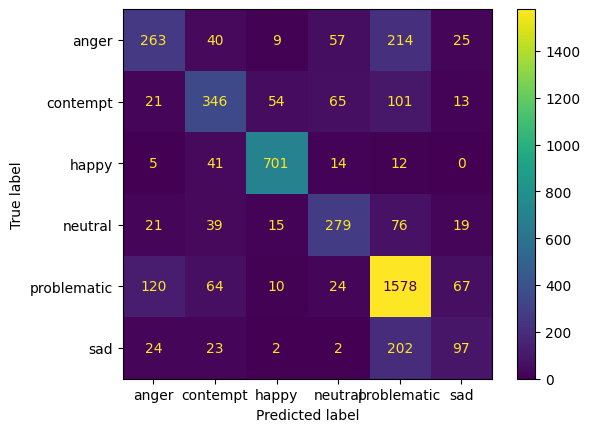

In [ ]:
preds = list()
actual = list()
resnet_with_problematic.eval()
with torch.inference_mode():

    for X,Y in test_with_problematic_dataloader:

      X = X.to(device)
      Y = Y.to(device)
      predictions = resnet_with_problematic(X)
      predictions = predictions.to('cpu')
      for i in range(len(predictions)):

        preds.append(predictions[i].argmax(dim=0))
        actual.append(Y[i].cpu())

cm = confusion_matrix(actual, preds, labels=[0,1,2,3,4,5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names_with_problematic)
disp.plot()
plt.show()

In [ ]:
torch.save(obj=resnet_with_problematic,
           f='/content/resnet_model_with_problematic.pt')